# 6/24 SunSpots

Playing 100 samples of each sin wave. Each sin wave corresponds to one day's worth of sunspot data, taking the number of sunspots plus the frequency 220hz, we end up with a clip of audio that cycles through 73k different sounds

In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve, decimate
from scipy import interpolate
from sklearn.decomposition import PCA
import sys
import time
sys.path.append("..")
from SlidingWindow import *
from Sunspot import *
%matplotlib notebook

<IPython.core.display.Javascript object>


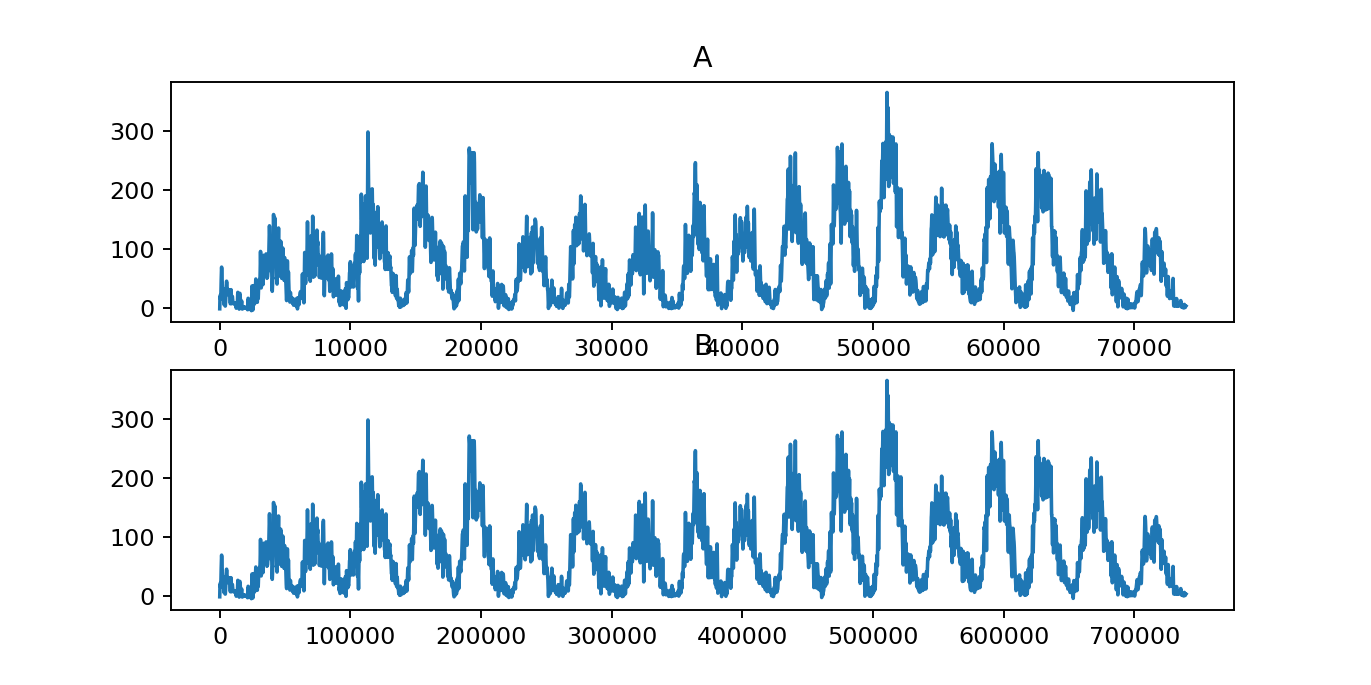

In [2]:
A = extractData()
decfac = 30 # How much I'm decimating (downsampling after smoothing)
fac = 10

decleft = decfac
decdone = 1
while decleft > 1:
    dec = min(decleft, 10)
    A = decimate(A, dec)
    decdone *= dec
    decleft = int(decleft / dec)
A = interpData(A, decdone)
B = interpData(A, fac)

plt.figure(figsize=(8, 4))
plt.subplot(2, 1, 1)
plt.plot(A)
plt.title("A")
plt.subplot(2, 1, 2)
plt.plot(B)
plt.title("B")

fs = 44100
ipd.Audio(B,rate=fs)

<IPython.core.display.Javascript object>


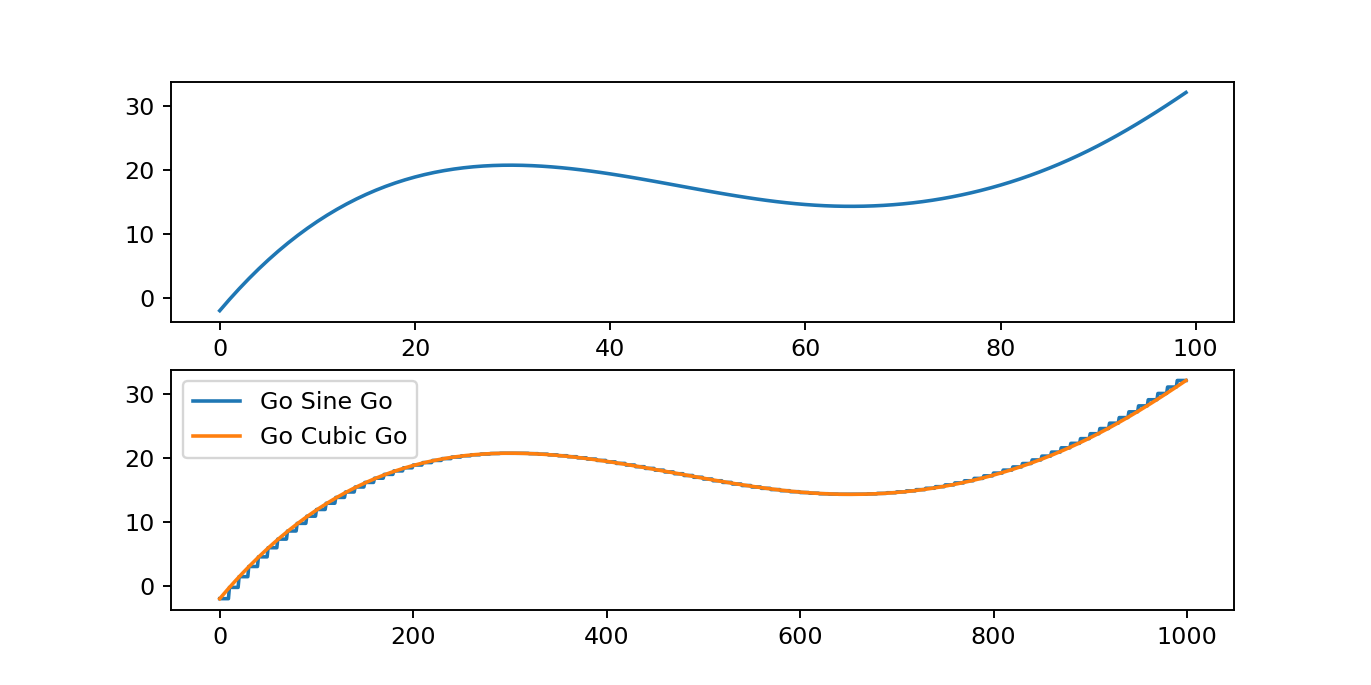

In [3]:
x = A[0:100]
xb = goSinGo(x)
xc = interpData(x, 10)

plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(x)
plt.subplot(212)
plt.plot(xb)
plt.plot(xc)
plt.legend(["Go Sine Go", "Go Cubic Go"])

<IPython.core.display.Javascript object>


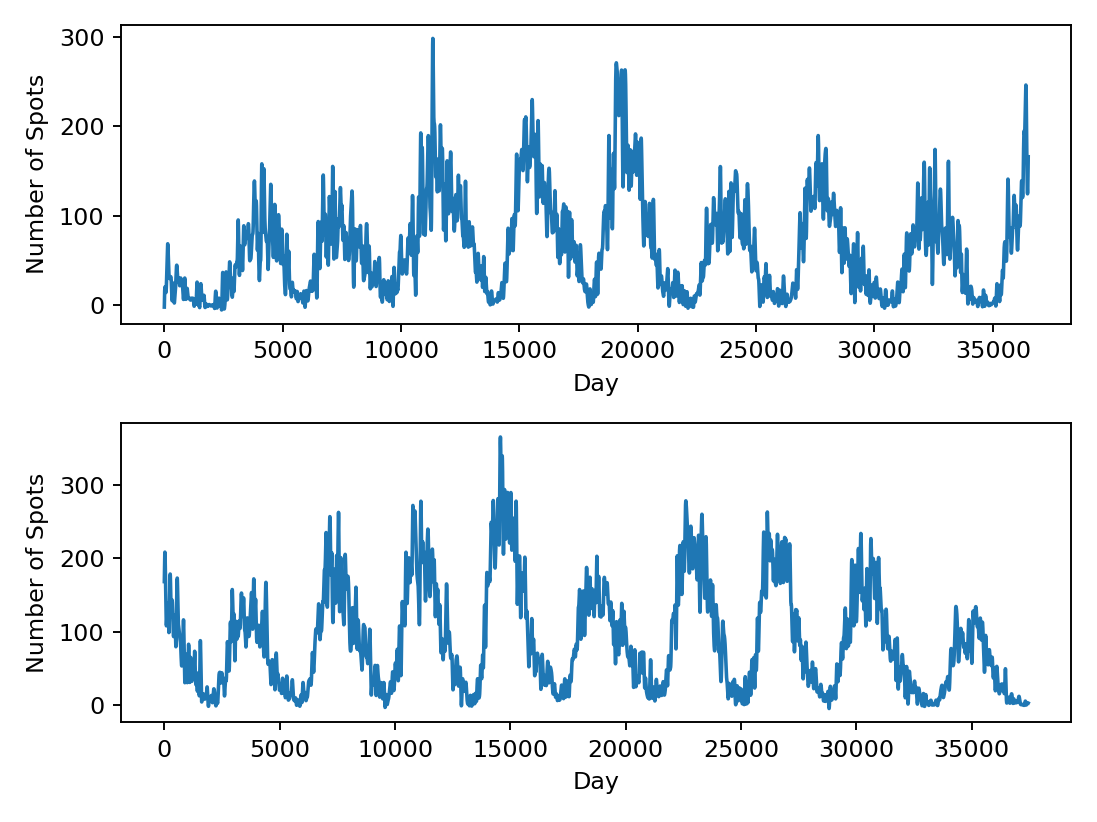

In [4]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(A[0:36500])
plt.xlabel("Day")
plt.ylabel("Number of Spots")
plt.subplot(2,1,2)
plt.plot(A[36500:len(A)])
plt.xlabel("Day")
plt.ylabel("Number of Spots")
plt.tight_layout()

# 6/25 Sunspots with interpolation

So see if you can do something similar and make x your sunspot and stretch out the sampling enough so that it occurs over 10 seconds or something

Try using the scipy interp function to stretch it out quickly

In [6]:
dim = 40
Tau = 80
dT = 1

tic = time.time()
X = getSlidingWindow(A,dim,Tau,dT)
toc = time.time()
print("Elapsed Time Interpolation:", toc-tic)

pca = PCA(n_components = 40)
Y = pca.fit_transform(X)

Elapsed Time Interpolation: 2.342603921890259


In [7]:
F = apply_freq_mod(X)
fs = 44100
ipd.Audio(F,rate=fs)